&nbsp;

## **Metric: Deer Population**
#### Panthers need prey in order to survive, and one of their main prey is deer. This analysis assumes that the amount of deer crossing signs correlates to the deer's presence and therefore population in the area.
&nbsp;



Top Ten Neighborhoods:

 neighborhood
Squirrel Hill South    11
Perry North             7
Stanton Heights         6
Duquesne Heights        3
South Side Slopes       3
Allentown               2
Crafton Heights         2
Perry South             2
Arlington               1
Arlington Heights       1
Name: description, dtype: int64


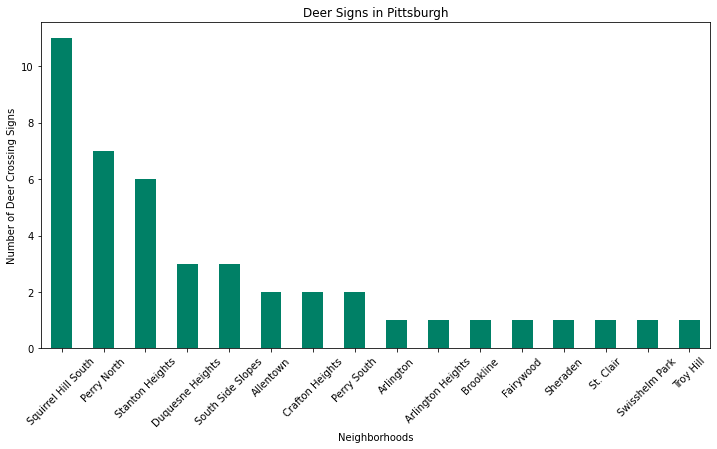

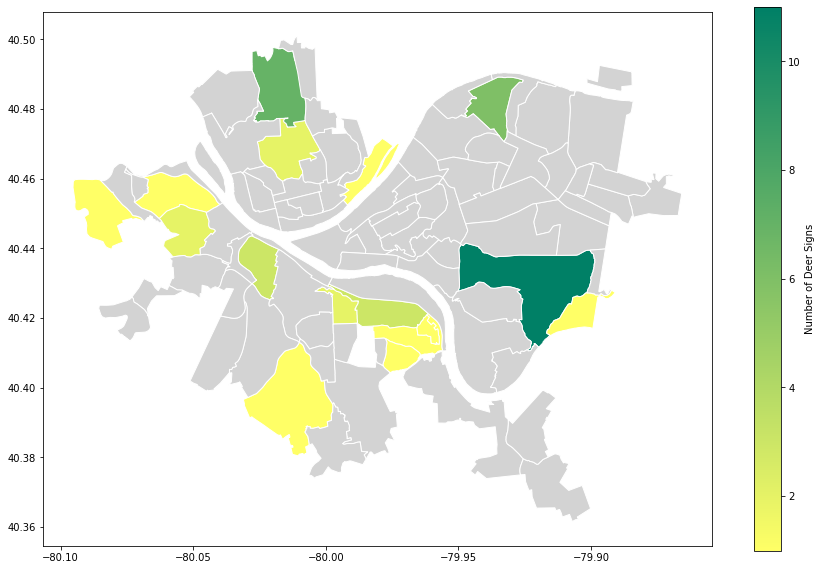

In [83]:
import pandas as pd
import geopandas
%matplotlib inline

#Sort through traffic sign data to eliminate any row that is not a deer sign
signs = pd.read_csv("trafficSigns.csv")
deer_mask = signs["description"] == "Deer"
deer_signs = signs[deer_mask]

#Count and sort by how many deer signs each neighborhood has
deer_signs = deer_signs.groupby("neighborhood").count()["description"].sort_values(ascending=False)
print("\nTop Ten Neighborhoods:\n\n", deer_signs.head(10))

#Plot the results on a bar graph
chart = deer_signs.plot.bar(x="Neighborhood", y="Number of Deer Signs", colormap="summer", rot=45, figsize=(12,6))
chart.set_title("Deer Signs in Pittsburgh")
chart.set_xlabel("Neighborhoods")
chart.set_ylabel("Number of Deer Crossing Signs")

#Make general map, merge data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods = neighborhoods.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10','tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
deer_map = neighborhoods.merge(deer_signs, how='left', left_on='hood', right_on='neighborhood')

#Plot the chloropleth map
deer_map.plot(column='description', cmap='summer_r', edgecolor="white", legend=True, 
              legend_kwds={'label': "Number of Deer Signs"}, figsize=(15,10),
              missing_kwds={"color": "lightgrey"})



&nbsp;

By and large, Squirrel Hill has the largest amount of deer signs coming in at 11. Second place is Perry North with 7 signs. 
